# Human vs Machine Learning Analysis: What affects the gross profit of IMDB's top rated 1000 movies

In [1]:
#Import required modules
import numpy as np
import pandas as pd

#### Load the dataset gotten from [kaggle](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows) which is a mirror of [IMDb's site](https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&view=advanced)

In [2]:
imdb_data = pd.read_csv('data/imdb_top_1000.csv')

In [3]:
#Take a quick overview at the dataset
imdb_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<a id = 'certificates'></a>
A quick insight into the column details

- Poster_Link: Link of the poster that IMDb is using
- Series_Title: Name of the movie
- Released_Year: Year in which the movie released   
- Certificate: Certificate earned by that movie where
>   1. A certifications are available for public exhibition, but with restriction to adults (aged 18+)
    2. UA certifications can contain moderate adult themes, but can be watched by a child below 12 years of age under parental guidance
    3. U certifications are fit for unrestricted public exhibition and are family-friendly
    4. PG-13 certifications strongly cautions parents since the movies may be inappropriate for children under 13
    5. R certifications are Restricted and any under-17 requires parental guidance to watch
    6. PG certifications recommeneds parental guidance if minors are to watch
    7. G certifications are fit for the general audience
    8. Passed or Approved are usually for movies around the time 1930 where the movie passed the rules of The Hayes Code
    9. TV-14 certifications are for movies that many parents would find unsuitable for children under 14 years of age
    10. 16 certifications are for ages 16 and over (16) adults
    11. TV-MA certifications are for mature audiences only, mostly 17+
    12. Unrated certifications are for movies that were not submitted to the relevant authorities for a rating
    13. GP certifications are for all ages but parental guidance is suggested
    14. TV-PG certifications suggests parental guidance if minors are to watch   
    Source([stackexchange](https://movies.stackexchange.com/questions/65430/what-are-the-meanings-of-the-terms-passed-and-approved-with-regards-to-a-mov)
    and [Wikipedia](https://www.wikipedia.org/)) <pre>                                                                       [forward](#forward)</pre>   
    
- Runtime: Total runtime of the movie
- Genre: Genre of the movie
- IMDB_Rating: Rating of the movie at IMDB site by several IMDB users
- Overview: Mini story/ Summary
- Meta_score: This score is the weighted average of many reviews coming from reputed critics
- Director: Name of the Director
- Star1, Star2, Star3, Star4: Name of the Stars
- No_of_votes: Total number of votes
- Gross: Money earned by that movie

---

By taking a quick view at what feature makes or breaks a movie's gross profit, ordinary observations at the dataset infer that    
- The Series_Title seems to be a moderate feature in that the name attracts some viewers but might not be useful for some other viewers also
- The Certificate which affects the age restriction allowed to watch the movie is an important feature, hence less or more viewers
- The genre is actually a very important feature due to several viewers' bias majorly into watching certain genres and not some others
- The IMDB_Rating is also very important in that scores by regular viewers of the movie does a lot in persuading new people to watch the movie also
- The Overview of the movie seems to be a good feature also in that it gives to-be viewers a summary of the movie. This can also attract or repel the to-be viewers
- The Meta_score which is a very good reflection of what critics think about the movie can also persuade people into watching the movie
- The Director might actually be an average feature of what attracts a very high number of viewers
- The presence of Stars in a movie can increase the popularity of the movie, hence more viewers, and also more die-hard fans of the stars can take up preaching the movie and converting people that might not otherwise watch the movie normally

#### After inference from basic observation and limited past experience, Let's clean the data before moving into the analysis part which would bring more convincing accounts into view   

## Data Cleaning

In [4]:
#Starting with checking for null values
imdb_data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

From the null values check above, the Certificate, the Meta_score and the Gross columns are the only ones with missing values.   
We can take a quick view at the unique values, and see how to fill in these missing values, or to drop the rows with missing values.

In [5]:
#Starting with the Certificate column
imdb_data['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

From the unique values above, we can replace the missing values with 'Unrated' since they don't have a certificate

In [6]:
imdb_data['Certificate'] = imdb_data['Certificate'].replace(np.nan, 'Unrated')

In [7]:
#From the unique Certificate values above, it can be noticed that UA was mistakenly written as U/A, so we can fix this
imdb_data['Certificate'] = imdb_data['Certificate'].replace('U/A', 'UA')

In [8]:
#Onto the Meta_score column
imdb_data['Meta_score'].unique()

array([ 80., 100.,  84.,  90.,  96.,  94.,  74.,  66.,  92.,  82.,  87.,
        73.,  83.,  nan,  79.,  91.,  61.,  59.,  65.,  85.,  98.,  89.,
        88.,  57.,  67.,  62.,  77.,  64.,  75.,  97.,  99.,  78.,  68.,
        81.,  95.,  76.,  69.,  55.,  70.,  58.,  86.,  71.,  63.,  93.,
        72.,  60.,  47.,  49.,  50.,  33.,  54.,  56.,  51.,  53.,  48.,
        44.,  45.,  40.,  52.,  28.,  36.,  46.,  30.,  41.])

Observing that the Meta_score values are numbers which are sensitive and are only given by critics, Filling in a random integer value would be inappropriate.   
And the null values can't be filled with a value like 'Unrated' since it'll affect a graph or plot of meta_score against gross.   
So, the null values for Meta_score will be dropped

In [9]:
imdb_data = imdb_data.dropna(subset = 'Meta_score')

Onto the Gross column, The column feature is just like that of the Meta_score column in terms of sensitivity and we can't just fill in any value, so, it'll be dropped

In [10]:
imdb_data = imdb_data.dropna(subset = 'Gross')

In [11]:
#Let's now confirm our changes to the dataset
imdb_data = imdb_data.reset_index().drop('index', axis = 1)
imdb_data.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

#### After dealing with the null values, We can now revisit the Certificate column

In [12]:
imdb_data['Certificate'].unique()

array(['A', 'UA', 'U', 'R', 'G', 'PG-13', 'PG', 'Passed', 'Unrated',
       'Approved', 'TV-PG', 'GP'], dtype=object)

<a id = 'forward'></a>

From the insight into the [certificate details stated above](#certificates), we can join the values that are very much related like
- U, G are for General audience
- Passed and approved can be likened to mean the same
- PG and TV-PG, GP can all be likened to mean the same

In [13]:
imdb_data['Certificate'] = imdb_data['Certificate'].replace({'G': 'U', 'Approved': 'Passed', 'TV-PG': 'PG', 'GP': 'PG'})
#.astype('category') 
#Replace and also convert to a category datatype

In [14]:
imdb_data['Certificate'].unique()

array(['A', 'UA', 'U', 'R', 'PG-13', 'PG', 'Passed', 'Unrated'],
      dtype=object)

#### We can now deal with removing the 'min' in the Runtime column, so we can work with that column as an integer

In [15]:
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace(' min', '').astype('int32')

#Rename the Runtime column to 'Runtime (mins)'
imdb_data.columns = imdb_data.columns.str.replace('Runtime', 'Runtime (mins)')

In [16]:
#Converting the Genre column to a category datatype
#imdb_data['Genre'] = imdb_data['Genre'].astype('category')

#### The Gross column currently has commas and therefore it's not recognized as an int or float column, so we'll remove the commas

In [17]:
imdb_data['Gross'] = imdb_data['Gross'].replace(',', '', regex = True).astype('int64')

#### Taking a look at the IMDb dataset after all the changes

In [18]:
imdb_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime (mins),Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


 ---

## The Human data analysis of several features against the Gross

From the imdb_data columns, we can observe that the columns such as Poster_Link, Series_Title, and the Overview have unique values for all the rows and no meaningful data difference can be made according to the data at hand.   

It'll be an extremely manual work to view each overview and analyze it against the poster image and the title to see if it conveys an attracting and compelling notion for someone to watch the movie
So, we'll not be working with those columns.

#### Let's take a visual look at the Runtime of the movies we're analyzing

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


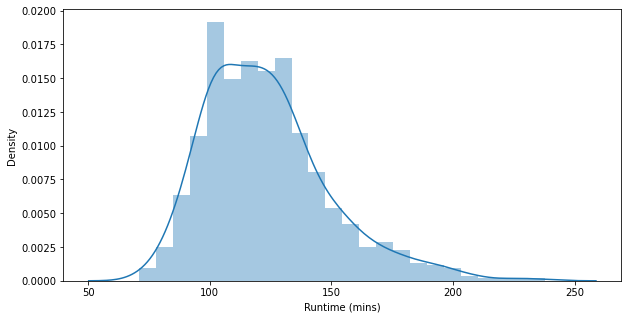

In [20]:
plt.figure(figsize = (10, 5))

sns.distplot(imdb_data['Runtime (mins)']);

This shows the movies in the dataset are around the range of 50 minutes to about 250 minutes runtime, with the peaks between 100 to 130 minutes.   

Another thing to note is that the movies are not short movies, since short movies have a running time of 40 minutes or less.   
Source: [Oscars](https://www.oscars.org/sites/oscars/files/91aa_short_films.pdf)

#### We can move on to check the concentration of the movie certificates over years, and how they affect the gross

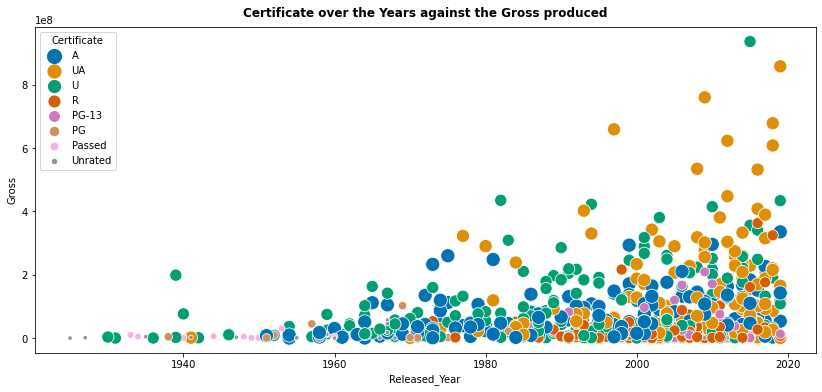

In [21]:
plt.figure(figsize=(14,6))

sns.scatterplot(y = imdb_data['Gross'], x = imdb_data['Released_Year'], hue = imdb_data['Certificate'], size = imdb_data['Certificate'], sizes=(20, 200), 
                legend = 'full', palette = 'colorblind')

plt.title('Certificate over the Years against the Gross produced', weight = 'bold', pad = 10);

This gives us a very good insight into how the U, A, UA and R movies dominate the top rated 1000 movies, with the UA certificate movies making the highest gross, followed by U compared to the others.
>where UA are movies with mild adult themes and can be watched by a child below 12 under parental guidance), and   
U are movies for general viewing and are family-friendly

The plot also gives us an insight into how the number of movies produced over the years increased drastically.

#### We can now move on to the Genre column to analyze the specific genres that produce more gross

In [22]:
#We'll be grouping by the top 20 genres, so let's create a function to ease the flow
def group_by_top_20(x):
    result = imdb_data.groupby(x, as_index = False)['Gross'].sum().sort_values(by = 'Gross', ascending = False)[:20]
    return result

genre_by_gross = group_by_top_20('Genre')

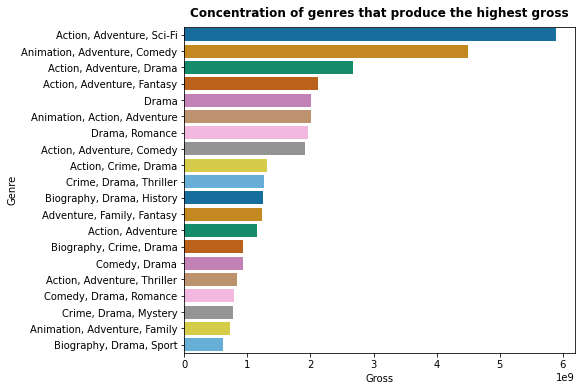

In [23]:
plt.figure(figsize = (7, 6))

sns.barplot(x = 'Gross', y = 'Genre', data = genre_by_gross, orient = 'h', palette = 'colorblind')
plt.title('Concentration of genres that produce the highest gross', weight = 'bold', pad = 10);

This shows the top 20 movie genres in regards to the amount of gross, showing that Action and Adventure genres take the lead, with some sparks of Sci-Fi, Animation, Comedy and Drama involved

#### Let's now analyze the ratings; the IMDB_Rating and the Meta_score against the Gross

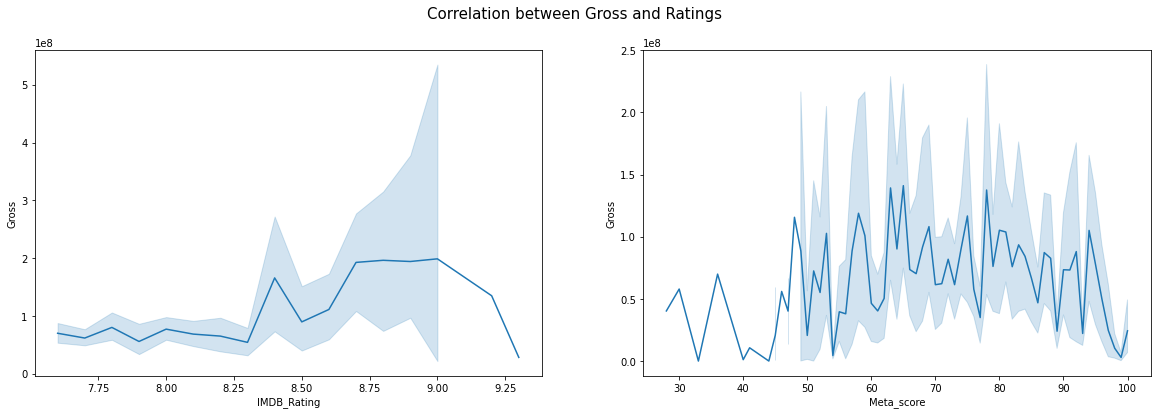

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

plt.suptitle('Correlation between Gross and Ratings', fontsize = 15)

sns.lineplot(x = imdb_data['IMDB_Rating'], y = imdb_data['Gross'], ax = ax[0])

sns.lineplot(x = imdb_data['Meta_score'], y = imdb_data['Gross'], ax = ax[1]);

This shows that both the IMDB_Rating and the Meta_score don't necessarily have a say in the gross that a movie makes.   

#### We can now access the effect of the Directors of the movies, and their correlation to the gross

In [25]:
#We'll be using the grouping by top 20 functions to select the top 20 Directors regarding the gross their movies made
directors_by_gross = group_by_top_20('Director')

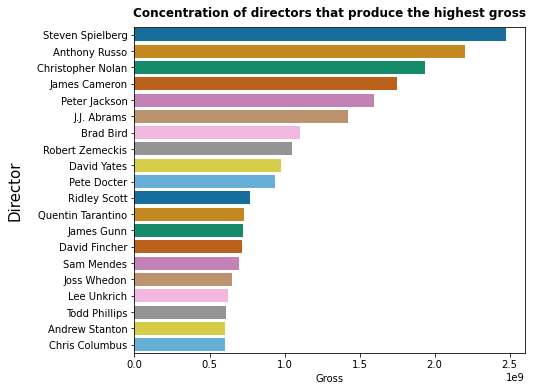

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (7, 6))

sns.barplot(x = 'Gross', y = 'Director', data = directors_by_gross, orient = 'h', palette = 'colorblind')

plt.title('Concentration of directors that produce the highest gross', weight = 'bold', pad = 10)
ax.set_ylabel('Director', labelpad = 15, size = 15);   
#The ylabel was specifically set to make the 'Director' label text look apart from the names of the directors

This gives a nice answer to the question 'Does the presence of a specific director affect the gross of that movie'. 
>Steven Spielberg (director of Jurassic Park),   
Anthony Russo(director of Avengers: Endgame and Infinity War) and   
Christopher Nolan's (director of Batman's The Dark Knight and Tenet)   
movies have produced a very high amount of gross profit compared to the other directors that directed other IMDB's top rated movies.

What a remarkable feat.   

#### Onto the effects of stars on the gross profit of a movie

In [27]:
#We'll use the same grouping by top 20 function to select the top 20 stars, but an upgrade to also reset the index and rename the Gross column in order to 
#maintain their gross when concatenating all the DataFrames
def group_reset_rename(num):
    df = group_by_top_20(f'Star{num}').reset_index().drop('index', axis = 1)
    df.columns = df.columns.str.replace('Gross', f'Gross{num}')
    return df

stars1, stars2, stars3, stars4 = group_reset_rename('1'), group_reset_rename('2'), group_reset_rename('3'), group_reset_rename('4')

all_top_stars = pd.concat([stars1, stars2, stars3, stars4], axis = 1)
all_top_stars

,Star1,Gross1,Star2,Gross2,Star3,Gross3,Star4,Gross4
0,Tom Hanks,2493097454,Emma Watson,1644165268,Rupert Grint,1518325484,Mark Ruffalo,1852246771
1,Joe Russo,2205039403,Robert Downey Jr.,1570268566,Carrie Fisher,1015164216,Domhnall Gleeson,1120300119
2,Leonardo DiCaprio,1877321752,Chris Evans,1456490219,Sigourney Weaver,999139749,Michelle Rodriguez,760507625
3,Daniel Radcliffe,1835901034,Ian McKellen,1195021217,Oscar Isaac,962105183,Michael Caine,751762442
4,Christian Bale,1351591432,Zoe Saldana,1150320726,Chris Evans,858373000,Orlando Bloom,720397270
5,Robert Downey Jr.,1150720327,Tim Allen,1040839121,Scarlett Johansson,702287244,Michael Gambon,682970416
6,Elijah Wood,1035942020,John Boyega,936662225,Chris Hemsworth,678815482,Scarlett Johansson,667850921
7,Daisy Ridley,936662225,Harrison Ford,922340616,Billy Zane,659325379,Kathy Bates,659325379
8,Mark Hamill,922340616,Kate Winslet,788589069,Orlando Bloom,620958668,Jeremy Renner,623279547
9,Craig T. Nelson,870022836,Tom Hardy,631776993,Sarah Vowell,608581744,Huck Milner,608581744


This gives an insight into the top 20 stars that produce the highest gross movies span across the top 4 actors per movie.   

With familiar names like **Tom Hanks**, Emma Watson, Leonardo DiCaprio, Rupert Grint and Mark Ruffalo, we can see that the data is providing some true real insights and the essence of stars in making a movie hit a high gross profit.   
This is where this quote comes into play:
>A guy stranded on an island' without **Tom Hanks** is not a movie. With another actor, (the movie ‘Cast Away’) would gross 40 million dollars. With Tom Hanks it
grossed 200 million dollars. There's no way to replace that kind of star power.   
<pre>           Bill Mechanic, Former Chairman of Twentieth Century Fox </pre>
---   

#### The only thing left in the human data analysis part is the essence of No_of_Votes in correlation to the Gross

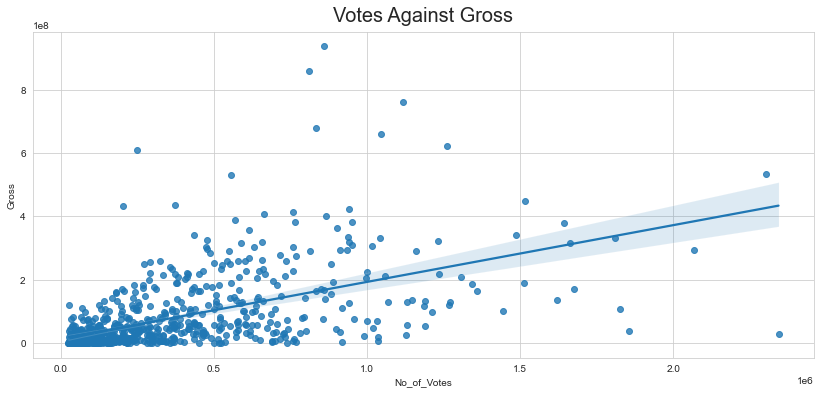

In [28]:
plt.figure(figsize = (14,6))

sns.set_style('whitegrid')
sns.regplot(x = imdb_data['No_of_Votes'], y = imdb_data['Gross'])

plt.title('Votes Against Gross', fontsize = 20, pad = 10);

Even though this shows a positive correlation of the No_of_Votes and the gross, the response is still considered average.   
Meaning that the No_of_Votes might or not necessarily have an effect on the gross profit of the movie, but it should be noted that the more the No_of_Votes, the higher the probability of a movie making more gross profit.   

#### So, at the end of the Human data analysis part, We can infer that for a movie to have a high amount of gross, it should focus on 
> - **Not being a short film, therefore, the length should be around 100 to 130 minutes**   
> - **UA and U certificate movies(PG-12, and general-viewing family-friendly movies)**   
> - **Action and Adventure genres, with some sparks of Sci-Fi, Animation, Comedy and Drama**   
> - **Having a very good Director with an amazing past record in terms of gross profit made by previous movies**   
> - **Very good star(s) power**   

---

## The Machine Learning Analysis of several features against the Gross

#### We'll be using several feature importance methods to test for the best features in the dataset, but before that let's view the dataset and only work with columns that are numerical or categorical in relation to the Gross

In [29]:
imdb_data.dtypes

Poster_Link        object
Series_Title       object
Released_Year       int64
Certificate        object
Runtime (mins)      int32
Genre              object
IMDB_Rating       float64
Overview           object
Meta_score        float64
Director           object
Star1              object
Star2              object
Star3              object
Star4              object
No_of_Votes         int64
Gross               int64
dtype: object

We already have some numerical data, let's focus on the text data that can be converted to categorical data, such as the Certificate and Genre columns
#### So, let's convert the text data to categorical data

In [30]:
#We can now use a LabelEncoder to encode the certificate values since models work better with numerical and categorical values
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()

imdb_data['Certificate'] = encoder.fit_transform(imdb_data['Certificate'])

In [32]:
#We can now pinpoint our numerical/categorical data for later use
imdb_numerical_data = imdb_data[['Released_Year', 'Certificate', 'Runtime (mins)', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']]

#### We can now visit the Genre column which is a combination of several Genres, We can use a MultiLabelBinarizer to encode the several Genres instead
Since the number of Genres are plenty, we'll be adding them to a separate dataframe

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer()

In [34]:
#This is used to create a list of strings containing the genres since this is a better suitable format to pass to the MultiLabelBinarizer
genre_data = imdb_data['Genre'].str.split(', ')

In [35]:
encoder.fit(genre_data)
new_columns = encoder.classes_

In [36]:
all_genres = pd.DataFrame(encoder.fit_transform(genre_data), columns = new_columns)

In [37]:
name_and_genre = imdb_data[['Series_Title', 'Genre']]

In [38]:
genre_df = pd.concat([name_and_genre, all_genres], axis = 1)

In [39]:
genre_df.head()

,Series_Title,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,Drama,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,"Crime, Drama",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,"Action, Crime, Drama",1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,"Crime, Drama",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,"Crime, Drama",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Starting with chi-squared statistical test

In [40]:
from sklearn.feature_selection import chi2, SelectKBest

In [41]:
#Apply SelectKBest class to extract all the 6 numerical features relating to Gross, from best to least
bestfeatures = SelectKBest(score_func = chi2, k = 6)

X = imdb_numerical_data   #Independent columns
y = imdb_data['Gross']   #Target feature: Gross

fit = bestfeatures.fit(X, y)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)

scores_df_complete = pd.concat([columns_df, scores_df], axis = 1)
scores_df_complete.columns = ['Feature', 'Score']

print(scores_df_complete.nlargest(6, 'Score'))   #Print the best features from best score to least of the 6 numerical features

          Feature         Score
5     No_of_Votes  2.688418e+08
2  Runtime (mins)  4.097027e+03
4      Meta_score  1.504800e+03
1     Certificate  1.125842e+03
0   Released_Year  1.424209e+02
3     IMDB_Rating  7.771679e+00


From this, The statistical test is inferring that the number of votes is a very strong correlation to the amount of gross a movie profits   
But let's also test the chi-squared statistical test on the different genre of movies against the gross

In [42]:
#Apply SelectKBest class to extract all the 21 genre classes relating to Gross, from best to least
bestfeatures = SelectKBest(score_func = chi2, k = 21)

X = genre_df.iloc[:, 2:]   #Independent columns: all the genres
y = imdb_data['Gross']   #Target feature: Gross

fit = bestfeatures.fit(X, y)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)

scores_df_complete = pd.concat([columns_df, scores_df], axis = 1)
scores_df_complete.columns = ['Feature', 'Score']

print(scores_df_complete.nlargest(21, 'Score'))   #Print the best features from best score to least of the 21 genre classes

      Feature       Score
9   Film-Noir  742.000000
13    Musical  739.000000
20    Western  734.000000
17      Sport  733.000000
19        War  717.000000
10    History  711.000000
12      Music  708.607143
7      Family  705.000000
11     Horror  702.214286
8     Fantasy  695.000000
2   Animation  686.000000
16     Sci-Fi  682.301724
14    Mystery  669.294521
3   Biography  662.000000
15    Romance  646.637363
18   Thriller  642.394231
0      Action  604.377622
5       Crime  590.307947
1   Adventure  585.000000
4      Comedy  576.093373
6       Drama  217.234463


The range of the scores for most of the genre aren't that wide, so we can infer that they relatively produce around the same gross, except for 'Drama' whose score in relation to Gross is very low.   

But there are still several other feature importance methods to check out before we come to a conclusion regarding what makes or breaks a movie's gross profit.

#### Using correlation heatmaps

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

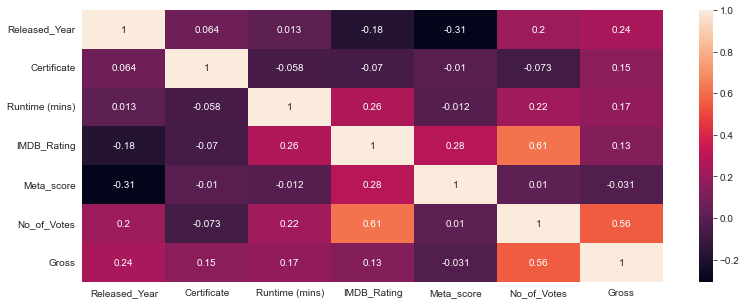

In [44]:
#Get the correlation of the features in the imdb dataset
correlation_matrix = imdb_data.corr()
top_corr_features = correlation_matrix.index

plt.figure(figsize = (13, 5))

#Plot the heatmap
g = sns.heatmap(imdb_data[top_corr_features].corr(), annot = True)

From the heatmap above, the No_of_Votes still leads with 0.56, followed by Released_Year, Runtime (mins), Certificate, IMDB_Rating, and then Meta_score with low correlation scores.   


Let's also test this on the genres in correlation to the Gross

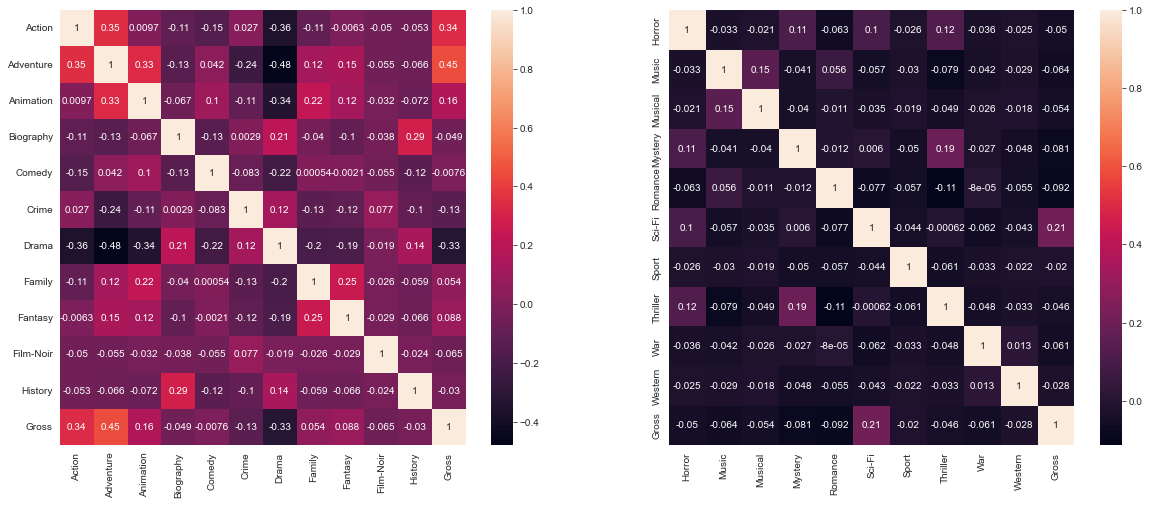

In [45]:
#We'll be divide the genres into half, and analyze against the Gross, due to the high number of genres available which will otherwise make the 
#heatmap muddled up

data_1 = pd.concat([genre_df.iloc[:, 2:13], imdb_data['Gross']], axis = 1)
correlation_matrix_1 = data_1.corr()   #Get the correlation of the genres against the Gross
top_corr_features_1 = correlation_matrix_1.index

data_2 = pd.concat([genre_df.iloc[:, 13:], imdb_data['Gross']], axis = 1)
correlation_matrix_2 = data_2.corr()   #Get the correlation of the genres against the Gross
top_corr_features_2 = correlation_matrix_2.index

fig, ax = plt.subplots(1, 2, figsize = (20, 8))

#Plot the heatmap
g = sns.heatmap(data_1[top_corr_features_1].corr(), annot = True, ax = ax[0])

#Plot the heatmap
g = sns.heatmap(data_2[top_corr_features_2].corr(), annot = True, ax = ax[1])

From the heatmaps for the genres, we can see that Adventure takes the lead, followed by Action, Sci-Fi, and Animation, while the remaining genres had very little correlation to the Gross   

Let's test one more feature importance method to ascertain our analysis

#### Using DecisionTreeRegressor in combination with AdaBoostRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.utils import shuffle

In [47]:
#Let's shuffle the data in order to prevent bias
X, y = shuffle(imdb_numerical_data, imdb_data['Gross'], random_state = 7)

In [48]:
#Train an AdaBoostRegressor using the DecisionTreeRegressor
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 400, random_state = 7)
regressor.fit(X, y)
#Since we'll not be predicting at this stage, the dataset wasn't separated into training and testing sets

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [49]:
# Extract feature importances
feature_importances = regressor.feature_importances_

# Normalize the importance values 
feature_importances = 100.0 * (feature_importances / max(feature_importances))

#Sort the values and flip them for plotting
index_sorted = np.flipud(np.argsort(feature_importances))

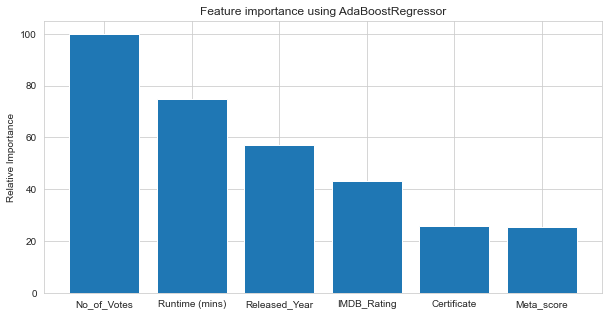

In [50]:
# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

#Plot the bar graph
plt.figure(figsize = (10, 5))
plt.title('Feature importance using AdaBoostRegressor')

plt.bar(pos, feature_importances[index_sorted], align='center')

plt.xticks(pos, imdb_numerical_data.columns[index_sorted])
plt.ylabel('Relative Importance');

The AdaBoostRegressor also infers that the No_of_Votes is the most important feature with a perfect correlation to Gross, followed by the Runtime and the Released_Year. This further ascertains the inference made by the first two feature importance methods used above.

Let's also use the AdaBoostRegressor to get the feature importance of the genres against the Gross

In [51]:
#Let's shuffle the data in order to prevent bias
X, y = shuffle(genre_df.iloc[:, 2:], imdb_data['Gross'], random_state = 7)

In [52]:
#Train an AdaBoostRegressor using the DecisionTreeRegressor
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 400, random_state = 7)
regressor.fit(X, y)
#Since we'll not be predicting at this stage, the dataset wasn't separated into training and testing sets

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [53]:
# Extract feature importances
feature_importances = regressor.feature_importances_

# Normalize the importance values 
feature_importances = 100.0 * (feature_importances / max(feature_importances))

#Sort the values and flip them for plotting
index_sorted = np.flipud(np.argsort(feature_importances))

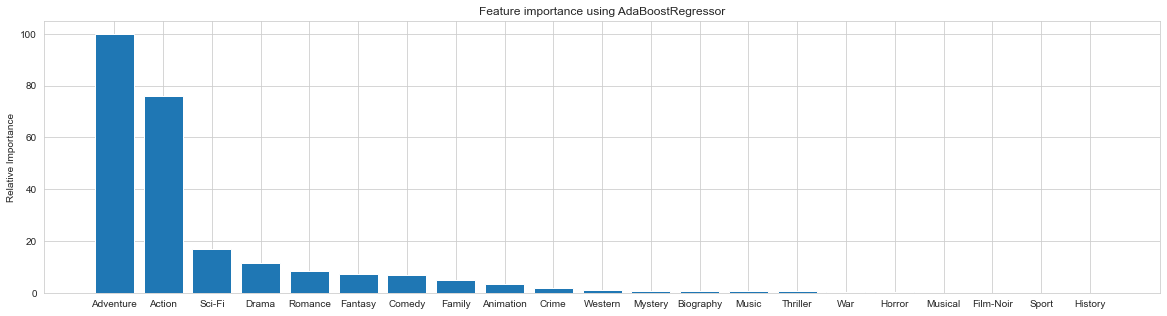

In [54]:
# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

#Plot the bar graph
plt.figure(figsize = (20, 5))
plt.title('Feature importance using AdaBoostRegressor')

plt.bar(pos, feature_importances[index_sorted], align='center')

plt.xticks(pos, genre_df.iloc[:, 2:].columns[index_sorted])
plt.ylabel('Relative Importance');

Looking at the three feature importance methods used, they all infer to a reasonable extent that Adventure, Action and Sci-Fi movies have a very strong correlation to the Gross profit.

#### So, at the end of the Machine Learning analysis part, It infers that for a movie to have a high amount of gross, it should focus on
> - **Having a high number of votes**   
> - **Having a high runtime**   
> - **The year of release**   
> - **Adventure and Action genres, and averagely the Film-Noir genre**   

## So, which part do you agree with?

From both part of the analysis, the human approach sounds more convincing to agree with.   

And another thing is that the machine learning approach brought more superficial answers, like high runtime, and year of release which to a normal movie fanatic like me, doesn't sound convincing as a very high runtime can make one tired of the movie, and the year of release doesn't really matter to people that enjoy the story line behind a movie and not just only about the movie's picture quality.

But one way the machine learning approach can get better is if more information can be derived from the the non-numerical columns; for example if there's an API that can get an image, get the title and overview, and score these features if they combine together really good in enticing people to watch the movie.
This is something a normal human can do without supervision, but a machine sadly doesn't have these capabilities yet.  

So, probably later in the future, the machine learning approach might provide extremely good results. But for now, the human approach is not only backed with data but also more convincing.
Thank you.